# GLD Shares Price Predictor Model - Durgesh
SPDR Gold Shares (GLD)
NYSEArca - Nasdaq Real Time Price. Currency in USD
@author: https://github.com/D4Techs


# 1. Import Libraries and Dataset 
<ol>
    <li> URL: https://query1.finance.yahoo.com/v7/finance/download/GLD?period1=1579273535&period2=1610895935&interval=1d&events=history&includeAdjustedClose=true </li>
    <li> Yahoo: https://finance.yahoo.com/quote/gld/history?ltr=1 </li> 
</ol>

In [1]:
#import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
Df = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/GLD?period1=1453075200&period2=1610928000&interval=1d&events=history&includeAdjustedClose=true")
print( "Shape is: " + str( Df.shape) )
Df['Date'] = pd.to_datetime(Df['Date'])
Df.head()

Shape is: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-19,104.059998,104.449997,103.650002,103.980003,103.980003,4588400
1,2016-01-20,105.169998,106.160004,104.940002,105.370003,105.370003,10120900
2,2016-01-21,104.989998,105.489998,104.519997,105.489998,105.489998,5425000
3,2016-01-22,104.930000,105.510002,104.760002,105.000000,105.000000,4185300
4,2016-01-25,105.760002,106.089996,105.599998,106.080002,106.080002,6819400


# 3. Visualization & Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000197C94499E8>,
      dtype=object)

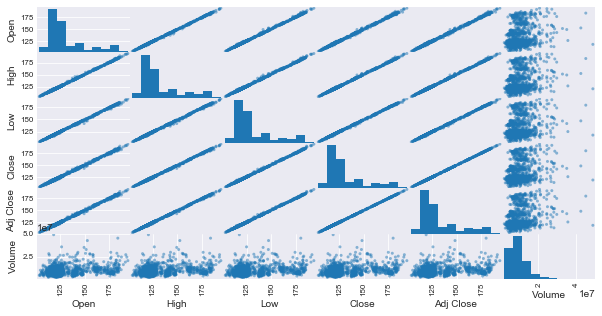

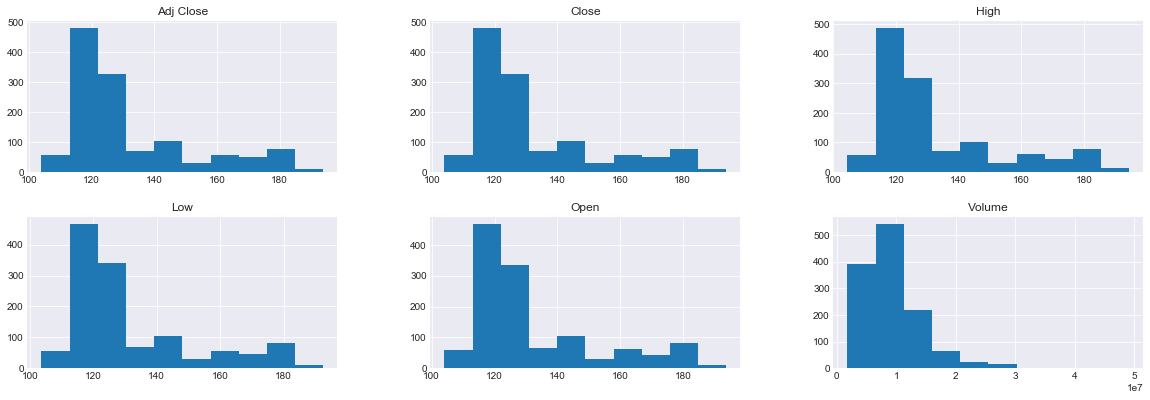

In [3]:
pd.scatter_matrix(Df, figsize=(10,5) )
Df.hist(sharex=False, sharey=False, layout=(3, 3), bins=10, figsize=(20,10))

# 3.1 Adding new columns
<li> S_3: Mean of 3 days </li>
<li> S_9: Mean of 9 days </li>
<li> <b> Output(y) </b> next_day_price: Price of last day CLOSE (Shift -1) <i>will not provide as input </i> </li>

In [4]:
# Define explanatory variables
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

Df = Df.dropna()
Df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,S_3,S_9,next_day_price
8,2016-01-29,106.610001,107.000000,106.260002,106.949997,106.949997,8098700,107.060000,106.043334,108.050003
9,2016-02-01,107.540001,108.150002,107.529999,108.050003,108.050003,10471800,107.180000,106.495556,108.089996
10,2016-02-02,107.919998,108.180000,107.349998,108.089996,108.089996,6656000,107.696665,106.797778,109.250000
11,2016-02-03,107.910004,109.580002,107.900002,109.250000,109.250000,15785200,108.463333,107.215556,110.570000
12,2016-02-04,110.449997,110.699997,109.919998,110.570000,110.570000,13213700,109.303332,107.834445,112.320000


### 3.2 Visualizing "FULL" dataset
In full view we can't see little error as below and model looks accurate even if it's not.

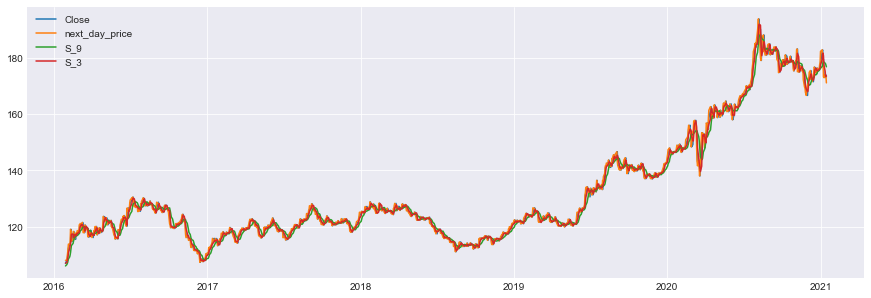

In [5]:
#Comparing FULL Close vs Next_Day_Close in current dataset
plt.figure(figsize=(15,5))
plt.plot(Df["Date"], Df["Close"])
plt.plot(Df["Date"], Df["next_day_price"])
plt.plot(Df["Date"], Df["S_9"])
plt.plot(Df["Date"], Df["S_3"])
plt.legend()

### 3.3 Visualizing "Last_30_Days" dataset
So we'll look deeply in this by selecting low data volume (last 30 days) and you can clearly see errors as below.

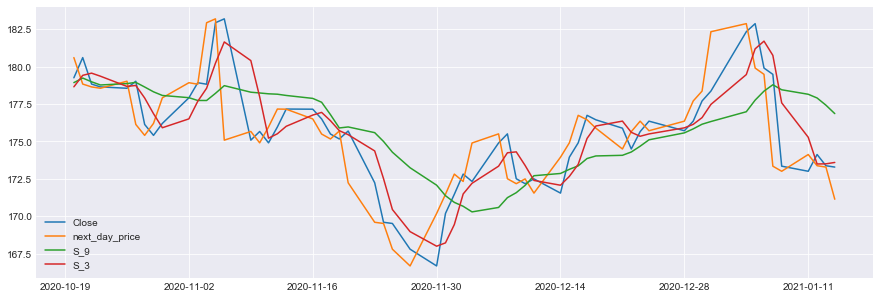

In [6]:
#Comparing Last 30 DAYS Close vs Next_Day_Close in current dataset
plt.figure(figsize=(15,5))
Df_sample = Df.tail(60)
plt.plot(Df_sample["Date"], Df_sample["Close"])
plt.plot(Df_sample["Date"], Df_sample["next_day_price"])
plt.plot(Df_sample["Date"], Df_sample["S_9"])
plt.plot(Df_sample["Date"], Df_sample["S_3"])
plt.legend()

# Model Building
Let's rock and build some models to predict something.

In [7]:
# Define dependent & independent variable
X = Df[["Open","High","Low","Close","Adj Close","Volume","S_3","S_9"]]
y = Df['next_day_price']

# Split the data into train and test dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# test_size = 70%
t = int(0.7 *len(Df))

# Train & Test dataset
X_train, y_train = X[:t], y[:t]
X_test, y_test = X[t:], y[t:]

In [8]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) =\n %.2f * Open +\n %.2f * High +\n %.2f * Low +\n %.2f * Close +\n %.2f * Adj Close \
+\n %.2f * Volume +\n %.2f * 3 Days Moving Average (x1) +\n %.2f * 9 Days Moving Average (x2) +\n %.2f (constant)" \
      % (linear.coef_[0], linear.coef_[1], linear.coef_[2], linear.coef_[3], linear.coef_[4], linear.coef_[5], \
         linear.coef_[6], linear.coef_[7], linear.intercept_))

Linear Regression model
Gold ETF Price (y) =
 -0.03 * Open +
 0.02 * High +
 -0.02 * Low +
 0.47 * Close +
 0.47 * Adj Close +
 -0.00 * Volume +
 0.13 * 3 Days Moving Average (x1) +
 -0.07 * 9 Days Moving Average (x2) +
 2.41 (constant)


In [9]:
print(linear.coef_, linear.intercept_)
Df.head()

[-2.99506959e-02  2.03255797e-02 -1.82761609e-02  4.71628078e-01
  4.71628078e-01 -6.85027267e-09  1.31036910e-01 -6.58188703e-02] 2.4149979037901375


,Date,Open,High,Low,Close,Adj Close,Volume,S_3,S_9,next_day_price
8,2016-01-29,106.610001,107.000000,106.260002,106.949997,106.949997,8098700,107.060000,106.043334,108.050003
9,2016-02-01,107.540001,108.150002,107.529999,108.050003,108.050003,10471800,107.180000,106.495556,108.089996
10,2016-02-02,107.919998,108.180000,107.349998,108.089996,108.089996,6656000,107.696665,106.797778,109.250000
11,2016-02-03,107.910004,109.580002,107.900002,109.250000,109.250000,15785200,108.463333,107.215556,110.570000
12,2016-02-04,110.449997,110.699997,109.919998,110.570000,110.570000,13213700,109.303332,107.834445,112.320000


In [10]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['price'])

Df_predicted = Df #copy data from original Dataset
Df_predicted["predicted_price"] = predicted_price #add predicted_price as New_Column
Df_predicted.dropna(inplace=True)

Df_predicted.head()

,Date,Open,High,Low,Close,Adj Close,Volume,S_3,S_9,next_day_price,predicted_price
883,2019-07-23,134.429993,134.949997,133.559998,133.690002,133.690002,9981400,134.203333,133.981110,134.369995,133.493346
884,2019-07-24,134.589996,134.839996,133.979996,134.369995,134.369995,6715200,134.169998,134.166665,133.419998,134.125843
885,2019-07-25,134.240005,134.279999,133.089996,133.419998,133.419998,11708200,133.826665,134.154443,133.639999,133.166730
886,2019-07-26,134.240005,134.289993,133.589996,133.639999,133.639999,6249900,133.809997,134.166665,134.529999,133.399715
887,2019-07-29,134.059998,134.729996,133.440002,134.529999,134.529999,9162400,133.863332,134.403332,134.979996,134.227749


### "FULL": Predicted Price vs Actual next_day_price Graph
Same for this one, error is not visible in full scale, we'll zoom in next step to verify.

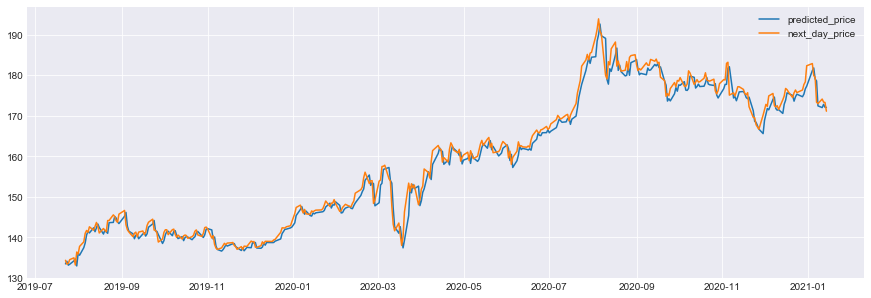

In [11]:
plt.figure(figsize=(15,5))
plt.plot(Df_predicted["Date"], Df_predicted["predicted_price"])
plt.plot(Df_predicted["Date"], Df_predicted["next_day_price"])
plt.legend()
plt.show()

### "Last 30 rows": Predicted Price vs Actual 'next_day_price' Graph
Same for this one, error is visible in small data size.

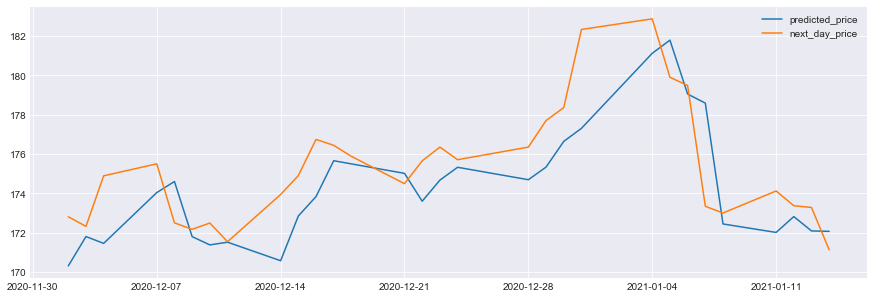

In [12]:
plt.figure(figsize=(15,5))
plt.plot(Df_predicted.tail(30)["Date"], Df_predicted.tail(30)["predicted_price"])
plt.plot(Df_predicted.tail(30)["Date"], Df_predicted.tail(30)["next_day_price"])
plt.legend()
plt.show()

In [13]:
# R square
r2_score = linear.score(X[t:], y[t:])*100
print("Linear Regression Model Accuracy: " + str( float("{0:.2f}".format(r2_score)) ) +"%")

Linear Regression Model Accuracy: 98.5%


# Create new Datamodel to decide wheather to action or not on gold.
<b>Columns:</b> (price, predicted_price_next_day, actual_price_next_day, gold_returns, signal, strategy_returns)

In [14]:
#create new datamodel (price, predicted_price_next_day, actual_price_next_day, gold_returns, signal, strategy_returns)
# to decide wheather to action or not on gold.

#t = sample size from dataset
t = int(0.8*len(Df))

gold = pd.DataFrame()

gold['Date'] = Df[t:]['Date']
gold['price'] = Df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)

gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)
gold['strategy_returns'] = gold.signal * gold['gold_returns']

print("Gold Datset Shape: " + str( (gold.shape) ) )
gold.tail()

Gold Datset Shape: (75, 7)


,Date,price,predicted_price_next_day,actual_price_next_day,gold_returns,signal,strategy_returns
1253,2021-01-08,173.339996,172.442473,173.000000,-0.001961,0,-0.000000
1254,2021-01-11,173.000000,172.011719,174.119995,0.006474,0,0.000000
1255,2021-01-12,174.119995,172.817209,173.369995,-0.004307,1,-0.004307
1256,2021-01-13,173.369995,172.089084,173.279999,-0.000519,0,-0.000000
1257,2021-01-14,173.279999,172.067039,171.130005,NaN,0,NaN


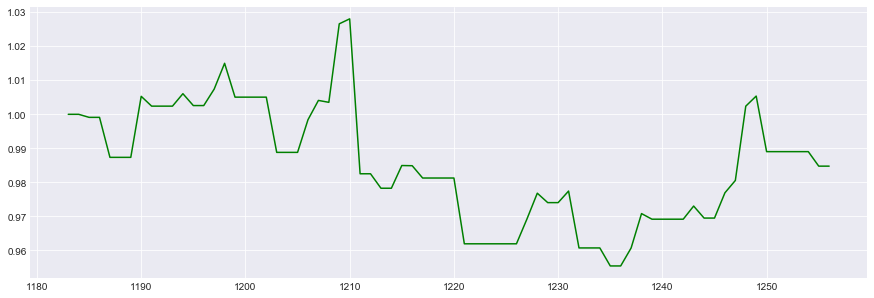

In [15]:
#plt.ylabel('Cumulative Returns')
((gold['strategy_returns']+1).cumprod()).plot( figsize=(15,5),color='g')
plt.show()

Sharpe Ratio -0.31


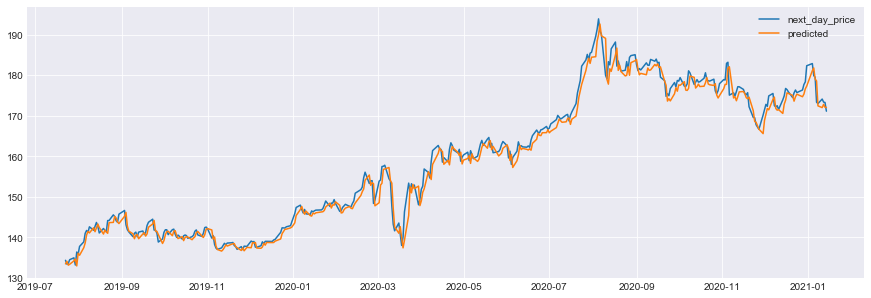

In [16]:
print('Sharpe Ratio %.2f' % (gold['strategy_returns'].mean()/gold['strategy_returns'].std()*(252**0.5)) )

Df["predicted"] = linear.predict(Df[ ["Open","High","Low","Close","Adj Close","Volume","S_3","S_9"] ] )
Df["Diff"] = Df["predicted"] - Df["Close"]

plt.figure(figsize=(15,5))
plt.plot(Df["Date"], Df["next_day_price"])
plt.plot(Df["Date"], Df["predicted"])
plt.legend()
plt.show()

# Summary Code
Main Code (Removed Analysis, Test, Graph, etc.)

In [17]:
#import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Df = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/GLD?period1=1453075200&period2=1610928000&interval=1d&events=history&includeAdjustedClose=true")
print( "Shape is: " + str( Df.shape) )
Df['Date'] = pd.to_datetime(Df['Date'])

# Define explanatory variables
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

Df = Df.dropna()

# Define dependent & independent variable
X = Df[["Open","High","Low","Close","Adj Close","Volume","S_3","S_9"]]
y = Df['next_day_price']

# Split the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['price'])

Df_predicted = Df #copy data from original Dataset
Df_predicted["predicted_price"] = predicted_price #add predicted_price as New_Column
Df_predicted.dropna(inplace=True)

# R square
r2_score = linear.score(X[t:], y[t:])*100
print("Linear Regression Model Accuracy: " + str( float("{0:.2f}".format(r2_score)) ) +"% \n\n")

#create new datamodel (price, predicted_price_next_day, actual_price_next_day, gold_returns, signal, strategy_returns)
# to decide wheather to action or not on gold.

#t = sample size from dataset
t = int(0.7*len(Df))

gold = pd.DataFrame()

gold['Date'] = Df[t:]['Date']
gold['price'] = Df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)

gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)
gold['strategy_returns'] = gold.signal * gold['gold_returns']

print("Gold Datset Shape: " + str( (gold.shape) ) )
print( gold.tail() )

Shape is: (1259, 7)
Linear Regression Model Accuracy: 99.63% 


Gold Datset Shape: (124, 7)
           Date       price  predicted_price_next_day  actual_price_next_day  \
1243 2020-12-23  175.649994                175.844380             176.350006   
1245 2020-12-28  175.710007                175.765813             176.350006   
1247 2020-12-30  177.699997                177.833818             178.360001   
1248 2020-12-31  178.360001                178.415553             182.330002   
1249 2021-01-04  182.330002                182.318080             182.869995   

      gold_returns  signal  strategy_returns  
1243      0.000342       1          0.000342  
1245      0.011325       0          0.000000  
1247      0.003714       1          0.003714  
1248      0.022258       1          0.022258  
1249           NaN       1               NaN  
